In [ ]:
# !pip install transformers
# !pip install sentencepiece

from read_write_qrcd import *
from assets import *
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForMaskedLM
import torch
import sentencepiece

In [3]:
passage_question_objects = read_JSONL_file('datasets/qrcd_v1.1_train.jsonl')

Loaded 710 records from datasets/qrcd_v1.1_train.jsonl
pq_id: 2:8-16_364
pq_id: 2:174-176_364
pq_id: 14:47-52_364
pq_id: 17:12-17_364
pq_id: 18:29-31_364
pq_id: 27:89-93_364
pq_id: 30:38-41_364
pq_id: 39:38-41_364
pq_id: 91:1-10_364
pq_id: 2:8-16_378
pq_id: 2:174-176_378
pq_id: 2:277-281_378
pq_id: 2:284-286_378
pq_id: 5:48-50_378
pq_id: 6:27-32_378
pq_id: 6:100-105_378
pq_id: 6:148-150_378
pq_id: 14:47-52_378
pq_id: 16:35-40_378
pq_id: 17:12-17_378
pq_id: 18:29-31_378
pq_id: 27:89-93_378
pq_id: 30:38-41_378
pq_id: 35:15-18_378
pq_id: 39:38-41_378
pq_id: 41:45-48_378
pq_id: 42:27-31_378
pq_id: 45:12-15_378
pq_id: 47:1-6_378
pq_id: 67:1-5_378
pq_id: 73:15-19_378
pq_id: 74:32-48_378
pq_id: 76:23-31_378
pq_id: 78:38-40_378
pq_id: 81:15-29_378
pq_id: 91:1-10_378
pq_id: 2:17-20_343
pq_id: 10:3-6_343
pq_id: 24:35-38_343
pq_id: 2:25-25_143
pq_id: 55:46-78_143
pq_id: 56:11-26_143
pq_id: 56:27-40_143
pq_id: 2:26-27_231
pq_id: 2:49-52_231
pq_id: 2:53-57_231
pq_id: 2:63-66_231
pq_id: 2:67-73_231


In [4]:
df_file = json_to_dataframe(passage_question_objects)

In [5]:
df_file.head()

,pq_id,passage,surah,verses,question,answers.text,answers.start_char
0,2:8-16_364,ومن الناس من يقول آمنا بالله وباليوم الآخر وما...,2,8-16,لماذا سيُحاسب ويُعذب الضال يوم القيامة ان كان ...,[أولئك الذين اشتروا الضلالة بالهدى],[504]
1,2:174-176_364,إن الذين يكتمون ما أنزل الله من الكتاب ويشترون...,2,174-176,لماذا سيُحاسب ويُعذب الضال يوم القيامة ان كان ...,[أولئك الذين اشتروا الضلالة بالهدى والعذاب بال...,[152]
2,14:47-52_364,فلا تحسبن الله مخلف وعده رسله إن الله عزيز ذو ...,14,47-52,لماذا سيُحاسب ويُعذب الضال يوم القيامة ان كان ...,[ليجزي الله كل نفس ما كسبت],[192]
3,17:12-17_364,وجعلنا الليل والنهار آيتين فمحونا آية الليل وج...,17,12-17,لماذا سيُحاسب ويُعذب الضال يوم القيامة ان كان ...,"[كل إنسان ألزمناه طائره في عنقه, من اهتدى فإنم...","[141, 252]"
4,18:29-31_364,وقل الحق من ربكم فمن شاء فليؤمن ومن شاء فليكفر...,18,29-31,لماذا سيُحاسب ويُعذب الضال يوم القيامة ان كان ...,[من شاء فليؤمن ومن شاء فليكفر],[18]


In [12]:
df_file['passage'][0]

'ومن الناس من يقول آمنا بالله وباليوم الآخر وما هم بمؤمنين. يخادعون الله والذين آمنوا وما يخدعون إلا أنفسهم وما يشعرون. في قلوبهم مرض فزادهم الله مرضا ولهم عذاب أليم بما كانوا يكذبون. وإذا قيل لهم لا تفسدوا في الأرض قالوا إنما نحن مصلحون. ألا إنهم هم المفسدون ولكن لا يشعرون. وإذا قيل لهم آمنوا كما آمن الناس قالوا أنؤمن كما آمن السفهاء ألا إنهم هم السفهاء ولكن لا يعلمون. وإذا لقوا الذين آمنوا قالوا آمنا وإذا خلوا إلى شياطينهم قالوا إنا معكم إنما نحن مستهزئون. الله يستهزئ بهم ويمدهم في طغيانهم يعمهون. أولئك الذين اشتروا الضلالة بالهدى فما ربحت تجارتهم وما كانوا مهتدين.'

In [6]:
df_file['question'].str.startswith("ماذا").value_counts()

False    698
True      12
Name: question, dtype: int64

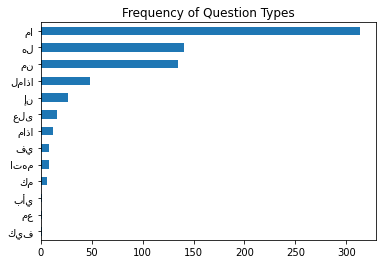

In [7]:
question_types = ["لماذا", "كيف", "هل", "إن", "ما", "من", "ماذا", "على", "اتهم", "كم", "مع", "في", "بأي"]
counts = {}
for q in question_types:
    counts[q] = df_file['question'].str.startswith(q).value_counts()[True] 

pd.Series(counts).sort_values().plot.barh()
plt.title("Frequency of Question Types")
plt.show()

In [8]:
model_ar_tok = "asafaya/albert-xlarge-arabic"
tokenizer = AutoTokenizer.from_pretrained(model_ar_tok, use_fast=False)

In [13]:
question = "لماذا سيُحاسب ويُعذب الضال يوم القيامة ان كان ""من يضلل الله فما له من هاد"" كما ورد من قوله تعالى في آية 23 و آية 36 من سورة الزمر؟"
context = """ومن الناس من يقول آمنا بالله وباليوم الآخر وما هم بمؤمنين. يخادعون الله والذين آمنوا وما يخدعون إلا أنفسهم وما يشعرون. في قلوبهم مرض فزادهم الله مرضا ولهم عذاب أليم بما كانوا يكذبون. وإذا قيل لهم لا تفسدوا في الأرض قالوا إنما نحن مصلحون. ألا إنهم هم المفسدون ولكن لا يشعرون. وإذا قيل لهم آمنوا كما آمن الناس قالوا أنؤمن كما آمن السفهاء ألا إنهم هم السفهاء ولكن لا يعلمون. وإذا لقوا الذين آمنوا قالوا آمنا وإذا خلوا إلى شياطينهم قالوا إنا معكم إنما نحن مستهزئون. الله يستهزئ بهم ويمدهم في طغيانهم يعمهون. أولئك الذين اشتروا الضلالة بالهدى فما ربحت تجارتهم وما كانوا مهتدين."""
inputs = tokenizer(question, context, return_tensors="pt")

In [14]:
inputs

{'input_ids': tensor([[    2,  1979,   233,  5916,   109,  4909,  3101,    62,   147,  1275,
           108,    58,    14, 27503,    24,   497,    76,    14,    11,    26,
            98,    88,   844,    14,   117,   141,    13, 12160,  2641,    17,
         12160,  9257,    14,   524, 15906,   124,     3,   120,   163,    14,
           176,  9679,    16,   661,   298, 10220,  7004,   166,    11,    47,
           330,  8215,    40,     9,    11,    20, 17627,    50,    24,  2843,
          9679,    48,   166,    11,    20,  7921,    50,   208, 29178,   166,
         19683,     9,    13,  4678,  1767, 24162,    47,    24, 17830,  9415,
          2908,    35,   628,   211,   477, 10636,    50,     9,  9876,   731,
           234,    33, 21659,    48,    13,  3370,   674,  8650,   528, 22918,
            50,     9,   208,  8303,    11,    47,    74,  3405,    50,   197,
            33, 19683,     9,  9876,   731,   234,  9679,    48,    88,  9679,
           163,   674,   108,  8215,  

In [24]:
print(tokenizer.decode(inputs["input_ids"][0]))

لماذا سيحاسب ويعذب الضال يوم القيامة ان كان من يضلل الله فما له من هاد كما ورد من قوله تعالى في اية 23 و اية 36 من سورة الزمر؟ ومن الناس من يقول امنا بالله وباليوم الاخر وما هم بمومنين. يخادعون الله والذين امنوا وما يخدعون الا انفسهم وما يشعرون. في قلوبهم مرض فزادهم الله مرضا ولهم عذاب اليم بما كانوا يكذبون. واذا قيل لهم لا تفسدوا في الارض قالوا انما نحن مصلحون. الا انهم هم المفسدون ولكن لا يشعرون. واذا قيل لهم امنوا كما امن الناس قالوا انومن كما امن السفهاء الا انهم هم السفهاء ولكن لا يعلمون. واذا لقوا الذين امنوا قالوا امنا واذا خلوا الى شياطينهم قالوا انا معكم انما نحن مستهزيون. الله يستهزي بهم ويمدهم في طغيانهم يعمهون. اوليك الذين اشتروا الضلالة بالهدى فما ربحت تجارتهم وما كانوا مهتدين.


In [ ]:
model   = AutoModelForMaskedLM.from_pretrained(model_ar_tok)

Downloading:   0%|          | 0.00/225M [00:00<?, ?B/s]